<a href="https://colab.research.google.com/github/hrstnikolov/Mathematics-for-Developers/blob/main/01_Intro_to_NNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense

# Intro to NNs

## Computational graphs

In [3]:
# Using tf functions
a = tf.constant(7)
b = tf.constant(5)

def compute(a, b):
    return tf.pow(tf.add(tf.multiply(2, a), tf.multiply(3, b)), 2)

compute(a, b).numpy()

841

In [4]:
# Simpler
def compute(a, b):
    return (2 * a + 3 * b) ** 2

compute(a, b).numpy()

841

In [5]:
# Functions works with any type of inputs
compute(2.0, 3.0)
compute(np.array([2, 3, 4]), np.array([3, 4, 5]))
compute(tf.constant(2), tf.constant(3))
compute(tf.constant([2, 3, 4]), tf.constant([3, 4, 5]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([169, 324, 529], dtype=int32)>

In [6]:
# TODO Visualize the computational graph.
# @tf.function
# def compute(a, b):
#     return (2 * a + 3 * b) ** 2

# %load_ext tensorboard

# # Set up logging.
# stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
# logdir = 'logs/func/%s' % stamp
# writer = tf.summary.create_file_writer(logdir)

# a, b = tf.constant([2, 3, 4]), tf.constant([3, 4, 5])
# tf.summary.trace_on(graph = True, profiler = True)
# result = compute(a, b)
# print(result.numpy())

# with writer.as_default():
#     tf.summary.trace_export(
#         name = "compute_trace",
#         step = 0,
#         profiler_outdir = "logs"
#     )

## MNIST

Why? To make the computer recongnize hand-written digits!

In [17]:
# Read MNIST.

(images_train, labels_train),  (images_test, labels_test) = mnist.load_data()

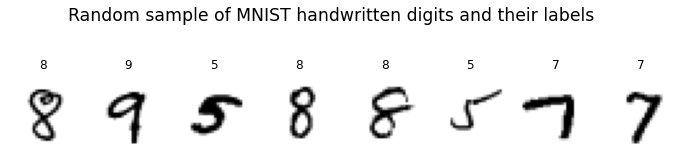

In [18]:
# Plot some random digits.

def plot_random_mnist_digits(attributes, labels):
    n_images = 8
    n_rows = 1
    n_cols = 8
    figsize = (12, 3)
    title = 'Random sample of MNIST handwritten digits and their labels'

    indeces = np.random.randint(0, len(attributes), size=n_images)    
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
    
    for i, ax in zip(indeces, axs.ravel()):
        ax.set_title(labels[i])
        ax.imshow(attributes[i], cmap='gray_r')
        ax.axis('off')
    
    plt.suptitle(title, fontsize='xx-large')


plot_random_mnist_digits(images_train, labels_train)

In [19]:
# Investigate the images shapes.

image_shape = images_train.shape[1:]
n_classes = len(set(labels_train))

print(f'The data consists of images with shape {image_shape}.')
print(f'There are {n_classes} distinct symbols (digits).')

The data consists of images with shape (28, 28).
There are 10 distinct symbols (digits).


In [20]:
# Reshape images to a single row.

n_train_images = len(images_train)
n_test_images = len(images_test)

images_train = images_train.reshape((n_train_images, -1))
images_test = images_test.reshape((n_test_images, -1))

new_image_shape = images_train.shape[1:]
print(f'The images are now in a single row with shape {new_image_shape}.')

The images are now in a single row with shape (784,).


In [21]:
# Scale data.

images_train = images_train / images_train.max()
images_test = images_test / images_test.max()

In [22]:
# Create model.
n_neurons = 16

model = Sequential(
    layers = [
        Input(shape=new_image_shape),
        Dense(n_neurons, activation='relu'),
        Dense(n_neurons, activation='relu'),
    ]
)

Calculate the number of weight coefficients.

**NUMBER OF NEURONS**  
Input 784  
1st hidden 16  
2st hidden 16  
Output 10  
<br>

**NUMBER OF COEFFS**  
input to 1st hidden  
weights = 784 * 16  
biases = 16  
total = 784 * 16 + 16 = 12560  

1st hidden to 2nd hidden  
weights = 16 * 16  
biases = 16  
total = 16 * 16 + 16 = 272  

2nd hidden to output
weights = 16 * 10  
biases = 10  
total = 16 * 10 + 10 = 170

grand total = 12560 + 272 + 170 = 13002  
<br>

**Finally...**  
The gradient vector is a vector in 13,002-dimention space! The `summary` below however does not count the 170, reason is unknown to me.

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
Total params: 12,832
Trainable params: 12,832
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(images_train, labels_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.8304 - accuracy: 0.1562
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.7189 - accuracy: 0.1217
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.6887 - accuracy: 0.1333
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.6184 - accuracy: 0.1607
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.6320 - accuracy: 0.1548
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.6289 - accuracy: 0.1550
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.6251 - accuracy: 0.1566
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.6412 - accuracy: 0.1500
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.6099 - accuracy: 0.1613
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.604